In [1]:
from scipy import integrate
import numpy as np
from numpy import exp
from scipy import special
from math import pi
# import xerus as xe
import pickle
import orth_pol_q
import matplotlib.pyplot as plt
import torch

In [2]:
def eval_Q(beta,X,filename):
    # X should be row vectors where each columns represent the i-th dimension of the data tested 
    Q = pickle.load(open(filename, 'rb'))
    d = len(Q)
    pol_deg,rank = Q[0].shape
    max_pol_deg = pol_deg-1
    max_pol_deg_vec = [max_pol_deg]*d
    data_size = len(X)
    
    all_phi = orth_pol_q.all_pol_basis(max_pol_deg_vec,d,beta)
    Phi_x = np.zeros((d,pol_deg,data_size))
    
    
    for i in range(d):
        phi_i = all_phi[i]
        xi = X[:,i]
        for j in range(pol_deg):
            poly = phi_i[j]
            pol_x = poly(xi)
            Phi_x[i,j,:] = pol_x
            
    for pos in range(d):
        if pos == 0:
            Qi = Q[0]
            eval_ = np.einsum('ij,ik->jk',Qi,Phi_x[pos,:,:])
        elif pos == d-1:
            Qi = Q[d-1]
            eval_ = np.einsum('il,ji,jl->l',eval_,Qi,Phi_x[pos,:,:])
        else: 
            Qi = Q[pos]
            eval_ = np.einsum('il,ijk,jl->kl',eval_,Qi,Phi_x[pos,:,:])

    return eval_

In [3]:
"""
Testing points in 2D and plot the estimation by the computed result for T = 20
"""

'\nTesting points in 2D and plot the estimation by the computed result for T = 20\n'

In [4]:
import pandas as pd
FD_file = pd.read_excel('test_data_T20.xlsx')

points_x = pd.DataFrame(FD_file['X'])
points_y = pd.DataFrame(FD_file['Y'])
target = pd.DataFrame(FD_file['committor'])
target_np = np.array(target.values)

new_pos = np.hstack((points_x.values,points_y.values))

Text(0.5, 1.0, 'approximation by FEM')

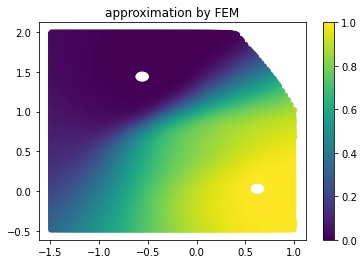

In [5]:
plt.scatter(new_pos[:,0],new_pos[:,1],c = target_np, s = 20)
plt.colorbar()
plt.title('approximation by FEM')


Text(0.5, 1.0, 'approximation by TT')

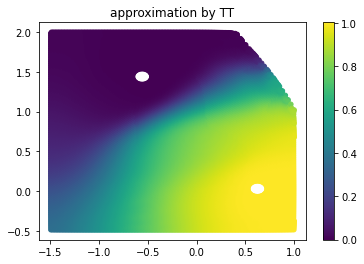

In [6]:
beta = 1/20
a1 = -1.5
a2 = 1
b1 = -0.5
b2 = 2
new_pos_trans = np.copy(new_pos)
new_pos_trans[:,0] =(2*new_pos_trans[:,0] - (a1 + a2))/(a2 - a1)
new_pos_trans[:,1] =(2*new_pos_trans[:,1] - (b1 + b2))/(b2 - b1)

eval_result = eval_Q(beta,new_pos_trans,"Q_T20_rank10")
plt.scatter(new_pos[:,0],new_pos[:,1],c= eval_result,s = 20)
plt.colorbar()
plt.title('approximation by TT')

In [7]:
## Now we compare the MAE and RMSE by the weight 
# first load the data calculated beforehead, THIS IS IN PYTORCH
mR_20 = torch.load('mR_20.pt')
mR_20 = mR_20.detach().numpy()

The MAE for TT when T = 20 is 0.007741914913844663, and RMSE is 0.00876679320820366


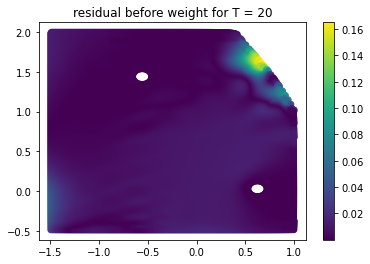

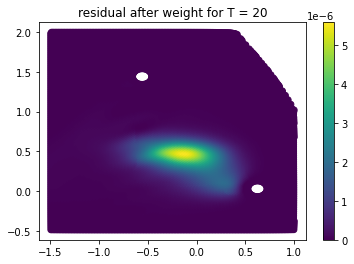

In [8]:
err_vec = np.abs(target_np-eval_result[:,None])
# relative error
MAE_T20 = np.sum(mR_20*err_vec)
RMSE_T20 = np.sqrt(np.sum(mR_20*err_vec**2))
print('The MAE for TT when T = 20 is {}, and RMSE is {}'.format(MAE_T20,RMSE_T20))

plt.scatter(new_pos[:,0],new_pos[:,1],c = err_vec)
plt.title('residual before weight for T = 20')
plt.colorbar()
plt.show()

plt.scatter(new_pos[:,0],new_pos[:,1],c = mR_20*err_vec)
plt.title('residual after weight for T = 20')
plt.colorbar()
plt.show()

In [9]:
"""
Testing points in 2D and plot the estimation by the computed result for T = 30
"""

'\nTesting points in 2D and plot the estimation by the computed result for T = 30\n'

In [10]:
import pandas as pd
FD_file = pd.read_excel('test_data_T30.xlsx')

points_x = pd.DataFrame(FD_file['X'])
points_y = pd.DataFrame(FD_file['Y'])
target = pd.DataFrame(FD_file['committor'])
target_np = np.array(target.values)

new_pos = np.hstack((points_x.values,points_y.values))

Text(0.5, 1.0, 'approximation by FEM')

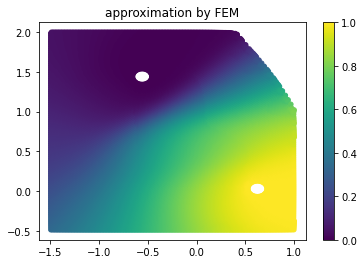

In [11]:
plt.scatter(new_pos[:,0],new_pos[:,1],c = target_np, s = 20)
plt.colorbar()
plt.title('approximation by FEM')


Text(0.5, 1.0, 'approximation by TT')

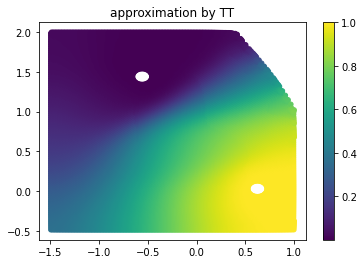

In [12]:
beta = 1/30
a1 = -1.5
a2 = 1
b1 = -0.5
b2 = 2
new_pos_trans = np.copy(new_pos)
new_pos_trans[:,0] =(2*new_pos_trans[:,0] - (a1 + a2))/(a2 - a1)
new_pos_trans[:,1] =(2*new_pos_trans[:,1] - (b1 + b2))/(b2 - b1)

eval_result = eval_Q(beta,new_pos_trans,"Q_T30_rank10")
plt.scatter(new_pos[:,0],new_pos[:,1],c= eval_result,s = 20)
plt.colorbar()
plt.title('approximation by TT')

In [13]:
## Now we compare the MAE and RMSE by the weight 
# first load the data calculated beforehead, THIS IS IN PYTORCH
mR_30 = torch.load('mR_30.pt')
mR_30 = mR_30.detach().numpy()

The MAE for TT when T = 30 is 0.012231090654732442, and RMSE is 0.014112141118375133


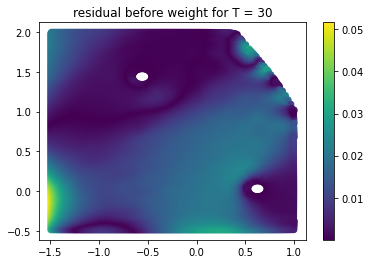

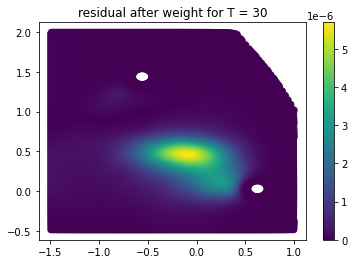

In [14]:
err_vec = np.abs(target_np-eval_result[:,None])
# relative error
MAE_T30 = np.sum(mR_30*err_vec)
RMSE_T30 = np.sqrt(np.sum(mR_30*err_vec**2))
print('The MAE for TT when T = 30 is {}, and RMSE is {}'.format(MAE_T30,RMSE_T30))

plt.scatter(new_pos[:,0],new_pos[:,1],c = err_vec)
plt.title('residual before weight for T = 30')
plt.colorbar()
plt.show()

plt.scatter(new_pos[:,0],new_pos[:,1],c = mR_30*err_vec)
plt.title('residual after weight for T = 30')
plt.colorbar()
plt.show()